# Questrade Portfolio Manager

In [1]:
import os
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
import src.credentials as cred
import matplotlib.pyplot as plt
from src.questrade import QuestradeBot

## Personal Inputs and QuestradeBot Initialization

In [2]:
switch = 1

if switch == 1:
    ACCOUNT_NUM = cred.QUESTRADE_ACCOUNT_NUM
    QUESTRADE_TOKEN = cred.QUESTRADE_API_CODE
else:
    ACCOUNT_NUM = cred.MJ_QUESTRADE_ACCOUNT_NUM
    QUESTRADE_TOKEN = cred.MJ_QUESTRADE_API_CODE


qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

## Account Balance

In [3]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.336500,0.00,31785.336500,100.00,0.00
USD,22870.703943,9001.86,31872.563943,71.76,28.24


## Portfolio Holdings

In [4]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,529.23,-10.40,5.88
O,REALTY INCOME CORP,USD,75,4932.75,7.47,54.80
JPM,JPMORGAN CHASE & CO.,USD,6,994.86,8.05,11.05
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,670.20,14.17,7.45
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,715.74,11.95,7.95
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,578.44,-4.65,6.43
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,577.55,-2.64,6.42


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

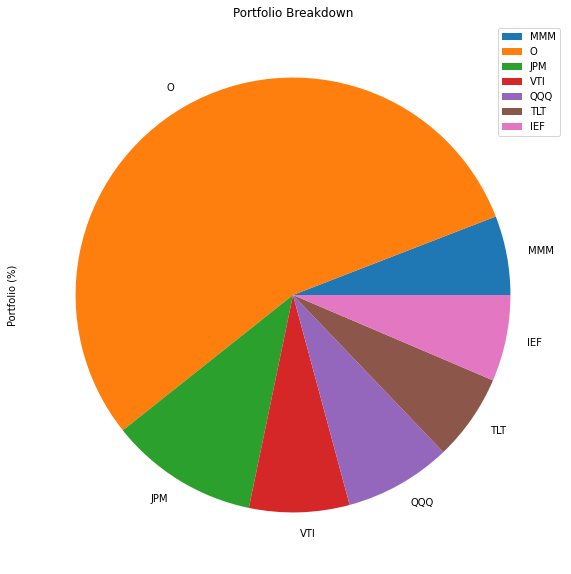

In [5]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

## Portfolio Return

In [6]:
portfolio_return = (portfolio['Return (%)'].dot(portfolio['Portfolio (%)'])) / 100
portfolio_return

5.908771999999999

## Monthly Dividend Income

In [7]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

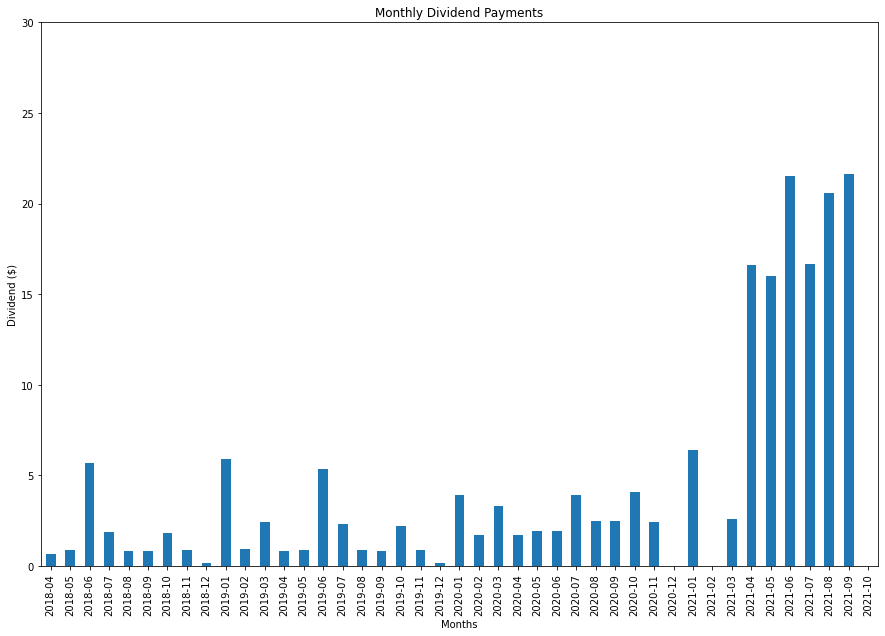

In [8]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

## Performance Against Benchmark